In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'C:\Users\medik\OneDrive\Desktop\Final Year Project\Experimental Data CSV\Set V_6.csv')
df.head(15)
df.drop(columns=['num_ift','num_CN','num_oil'],inplace=True)
df

,mic1,suc1,bio1,mic2,mic3,suc2,suc3,bio2,bio3,ift1,ift2,ift3,time
0,0.114500,19.751000,0.082100,0.10080,0.11242,19.765,19.689,0.08450,0.07450,45.001,45.256,44.544,0.0
1,0.204750,19.184000,0.184340,0.18560,0.20045,19.005,19.124,0.17642,0.16859,41.235,40.895,40.752,12.0
2,0.375600,17.521000,0.237410,0.32450,0.35634,17.520,17.535,0.22513,0.24510,36.421,36.123,35.228,24.0
3,0.521300,16.724000,0.275640,0.48964,0.49865,16.711,16.735,0.26417,0.26621,32.101,32.012,32.156,36.0
4,0.687900,15.658000,0.382170,0.62456,0.71580,15.659,15.556,0.35618,0.37520,29.101,30.014,29.456,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,2.163450,7.833434,1.374066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142,2.163642,7.832321,1.374187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143,2.163788,7.831479,1.374279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144,2.163898,7.830841,1.374348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 # TIME VS SUCROSE



In [3]:
#EXP TIME VS SUCROSE
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(pd.DataFrame(df['time'][0:12]),pd.DataFrame(df['suc3'][0:12]))
pred_suc3=LR.predict(pd.DataFrame(np.arange(0,133)))
pred_suc3

array([[19.78353846],
       [19.692875  ],
       [19.60221154],
       [19.51154808],
       [19.42088462],
       [19.33022115],
       [19.23955769],
       [19.14889423],
       [19.05823077],
       [18.96756731],
       [18.87690385],
       [18.78624038],
       [18.69557692],
       [18.60491346],
       [18.51425   ],
       [18.42358654],
       [18.33292308],
       [18.24225962],
       [18.15159615],
       [18.06093269],
       [17.97026923],
       [17.87960577],
       [17.78894231],
       [17.69827885],
       [17.60761538],
       [17.51695192],
       [17.42628846],
       [17.335625  ],
       [17.24496154],
       [17.15429808],
       [17.06363462],
       [16.97297115],
       [16.88230769],
       [16.79164423],
       [16.70098077],
       [16.61031731],
       [16.51965385],
       [16.42899038],
       [16.33832692],
       [16.24766346],
       [16.157     ],
       [16.06633654],
       [15.97567308],
       [15.88500962],
       [15.79434615],
       [15

In [4]:
print(np.round(LR.coef_,5) )
np.round(LR.intercept_,5)




[[-0.09066]]


array([19.78354])

### PLOTS: TIME VS SUCROSE

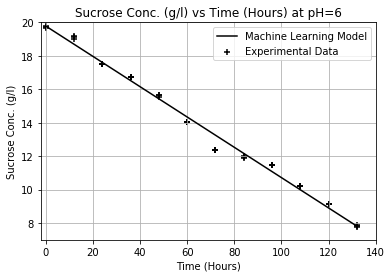

In [5]:
plt.plot(pd.DataFrame(np.arange(0,133)),pred_suc3,label='Machine Learning Model',color='black')
plt.scatter(df[['time']][0:12],df[['suc1']][0:12],color='black',label='Experimental Data',marker='+')
plt.scatter(df[['time']][0:12],df[['suc2']][0:12],color='black',marker='+')
plt.scatter(df[['time']][0:12],df[['suc3']][0:12],color='black',marker='+')

plt.xlabel('Time (Hours)')
plt.ylabel('Sucrose Conc. (g/l)')
plt.title('Sucrose Conc. (g/l) vs Time (Hours) at pH=6')
plt.xlim(-2,140)
plt.ylim(7,20)
plt.grid()
plt.legend()
plt.show()

 # SUCROSE VS MICROBE


In [6]:
LS=LinearRegression()
LS.fit(df[['suc3']][0:12],df[['mic3']][0:12])
pred_mic3=LS.predict(pred_suc3)
pred_mic3
print(pred_mic3.max())

2.0408448695394843


In [7]:
print(np.round(LS.coef_,5) )
np.round(LS.intercept_,5)
#print(pred_mic.max())

[[-0.16877]]


array([3.35997])

### PLOTS: SUCROSE VS MICROBE

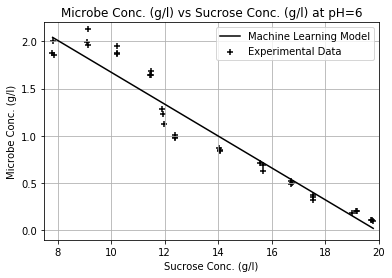

In [8]:
plt.plot(pred_suc3,pred_mic3,label='Machine Learning Model',color='black')
plt.scatter(df['suc1'][0:12],df['mic1'][0:12],label='Experimental Data',color='black',marker='+')
plt.scatter(df['suc2'][0:12],df['mic2'][0:12],color='black',marker='+')
plt.scatter(df['suc3'][0:12],df['mic3'][0:12],color='black',marker='+')
plt.grid()
plt.legend()

plt.xlabel('Sucrose Conc. (g/l)')
plt.ylabel('Microbe Conc. (g/l)')
plt.title('Microbe Conc. (g/l) vs Sucrose Conc. (g/l) at pH=6')
plt.xlim(7.5,20)
plt.ylim(-0.1,2.2)
plt.show()

# MICROBE VS BIOSURFACTANT

In [9]:
LT=LinearRegression()
LT.fit(df[['mic3']][0:12],df[['bio3']][0:12])
pred_bio3=LT.predict(pred_mic3)
print(pred_bio3.max())
print(pred_bio3.min())
print(pred_bio3)

1.4243197087615096
-0.06752304209484264
[[-6.75230421e-02]
 [-5.62212031e-02]
 [-4.49193641e-02]
 [-3.36175250e-02]
 [-2.23156860e-02]
 [-1.10138470e-02]
 [ 2.87992035e-04]
 [ 1.15898311e-02]
 [ 2.28916701e-02]
 [ 3.41935091e-02]
 [ 4.54953481e-02]
 [ 5.67971871e-02]
 [ 6.80990262e-02]
 [ 7.94008652e-02]
 [ 9.07027042e-02]
 [ 1.02004543e-01]
 [ 1.13306382e-01]
 [ 1.24608221e-01]
 [ 1.35910060e-01]
 [ 1.47211899e-01]
 [ 1.58513738e-01]
 [ 1.69815577e-01]
 [ 1.81117416e-01]
 [ 1.92419255e-01]
 [ 2.03721094e-01]
 [ 2.15022933e-01]
 [ 2.26324772e-01]
 [ 2.37626611e-01]
 [ 2.48928451e-01]
 [ 2.60230290e-01]
 [ 2.71532129e-01]
 [ 2.82833968e-01]
 [ 2.94135807e-01]
 [ 3.05437646e-01]
 [ 3.16739485e-01]
 [ 3.28041324e-01]
 [ 3.39343163e-01]
 [ 3.50645002e-01]
 [ 3.61946841e-01]
 [ 3.73248680e-01]
 [ 3.84550519e-01]
 [ 3.95852358e-01]
 [ 4.07154197e-01]
 [ 4.18456036e-01]
 [ 4.29757875e-01]
 [ 4.41059714e-01]
 [ 4.52361553e-01]
 [ 4.63663392e-01]
 [ 4.74965231e-01]
 [ 4.86267070e-01]
 [ 4.97568

In [10]:

print(np.round(LT.coef_,5))
np.round(LT.intercept_,5)

[[0.73861]]


array([-0.08307])

# PLOTS: MICROBE VS BIOSURFACTANT

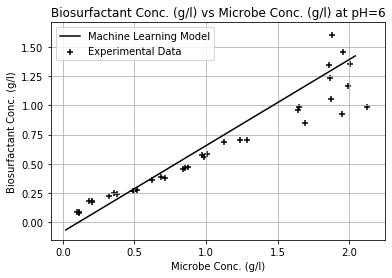

In [11]:
plt.plot(pred_mic3,pred_bio3,label='Machine Learning Model',color='black')
plt.scatter(df['mic1'][0:12],df['bio1'][0:12],label='Experimental Data',color='black',marker='+')
plt.scatter(df['mic2'][0:12],df['bio2'][0:12],color='black',marker='+')
plt.scatter(df['mic3'][0:12],df['bio3'][0:12],color='black',marker='+')
plt.legend()
plt.grid()

plt.xlabel('Microbe Conc. (g/l)')
plt.ylabel('Biosurfactant Conc. (g/l)')
plt.title('Biosurfactant Conc. (g/l) vs Microbe Conc. (g/l) at pH=6')
#plt.xlim(0,1.8)
#plt.ylim(-0.1,1.3)
plt.show()

# IFT

In [12]:
print('Max. Pred. Bio: ',pred_bio3.max())
print('Min. Pred. Bio: ',pred_bio3.min())
print('Max. Exp. IFT: ',df[['ift1','ift2','ift3']].max())
print('Min. Exp. IFT: ',df[['ift1','ift2','ift3']].min())

Max. Pred. Bio:  1.4243197087615096
Min. Pred. Bio:  -0.06752304209484264
Max. Exp. IFT:  ift1    45.001
ift2    45.256
ift3    44.544
dtype: float64
Min. Exp. IFT:  ift1    14.5654
ift2    14.2234
ift3    14.3264
dtype: float64


In [13]:
import math
calc_ift3=10**((math.log((df['ift2'].min()),10)+math.log((df['ift2'].max()/df['ift2'].min()),10)*((pred_bio3-pred_bio3.max())/(pred_bio3.min()-pred_bio3.max()))**2.2))
calc_ift3



array([[45.256     ],
       [44.39523393],
       [43.55846616],
       [42.74494261],
       [41.95393601],
       [41.18474484],
       [40.43669241],
       [39.70912582],
       [39.00141513],
       [38.31295242],
       [37.64315098],
       [36.99144451],
       [36.35728633],
       [35.74014866],
       [35.13952189],
       [34.55491391],
       [33.98584947],
       [33.43186952],
       [32.89253063],
       [32.36740442],
       [31.85607698],
       [31.35814836],
       [30.87323205],
       [30.40095448],
       [29.94095457],
       [29.49288326],
       [29.05640307],
       [28.63118771],
       [28.21692166],
       [27.81329977],
       [27.42002691],
       [27.03681762],
       [26.66339572],
       [26.29949406],
       [25.94485414],
       [25.5992258 ],
       [25.26236699],
       [24.93404343],
       [24.61402836],
       [24.30210227],
       [23.99805267],
       [23.70167383],
       [23.41276655],
       [23.13113795],
       [22.85660123],
       [22

**Numerical IFT**

In [14]:
num_bio=df['bio1'][13:]
print('Min Bio: ',num_bio.min())
print('Max Bio: ',num_bio.max())
print('Min IFT: ',df[['ift1','ift2','ift3']].min())
print('Max IFT: ',df[['ift1','ift2','ift3']].max())

Min Bio:  0.082572
Max Bio:  1.374401
Min IFT:  ift1    14.5654
ift2    14.2234
ift3    14.3264
dtype: float64
Max IFT:  ift1    45.001
ift2    45.256
ift3    44.544
dtype: float64


In [15]:
from math import *
num_ift=10**((log((df['ift2'].min()),10)+log((df['ift2'].max()/df['ift2'].min()),10)*((num_bio-num_bio.max())/(num_bio.min()-num_bio.max()))**2.2))
df['num_ift']=num_ift
num_ift

13     43.739866
14     45.256000
15     45.053635
16     44.846351
17     44.633913
         ...    
141    14.223400
142    14.223400
143    14.223400
144    14.223400
145    14.223400
Name: bio1, Length: 133, dtype: float64

### PLOTS: IFT VS BIO

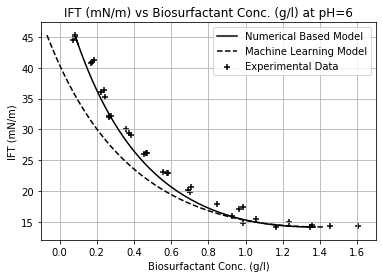

In [16]:
plt.plot(df['bio1'][13:],num_ift,color='black',label='Numerical Based Model')
plt.plot(pred_bio3,calc_ift3,color='black',label='Machine Learning Model',linestyle='dashed')
plt.scatter(df['bio1'][0:12],df['ift1'][0:12],color='black',marker='+',label='Experimental Data')
plt.scatter(df['bio2'][0:12],df['ift2'][0:12],color='black',marker='+')
plt.scatter(df['bio3'][0:12],df['ift3'][0:12],color='black',marker='+')
plt.grid()
plt.xlabel('Biosurfactant Conc. (g/l)')
plt.ylabel('IFT (mN/m)')
plt.title('IFT (mN/m) vs Biosurfactant Conc. (g/l) at pH=6')
plt.xlim(-0.1,1.7)
plt.legend()
plt.show()

# CN

In [17]:
num_CN=(0.0005*0.001*1000)/(num_ift)
print(num_CN)

ml_CN=(0.0005*0.001*1000)/(calc_ift3)
print(ml_CN)

ml_CN_1=(0.0005*0.001*1000)/(df['ift1'][0:12])
print(ml_CN_1)

ml_CN_2=(0.0005*0.001*1000)/(df['ift2'][0:12])
print(ml_CN_2)

ml_CN_3=(0.0005*0.001*1000)/(df['ift3'][0:12])
print(ml_CN_3)


13     0.000011
14     0.000011
15     0.000011
16     0.000011
17     0.000011
         ...   
141    0.000035
142    0.000035
143    0.000035
144    0.000035
145    0.000035
Name: bio1, Length: 133, dtype: float64
[[1.10482588e-05]
 [1.12624702e-05]
 [1.14788248e-05]
 [1.16972902e-05]
 [1.19178329e-05]
 [1.21404176e-05]
 [1.23650074e-05]
 [1.25915640e-05]
 [1.28200476e-05]
 [1.30504169e-05]
 [1.32826288e-05]
 [1.35166390e-05]
 [1.37524015e-05]
 [1.39898691e-05]
 [1.42289927e-05]
 [1.44697221e-05]
 [1.47120054e-05]
 [1.49557894e-05]
 [1.52010195e-05]
 [1.54476397e-05]
 [1.56955924e-05]
 [1.59448190e-05]
 [1.61952593e-05]
 [1.64468520e-05]
 [1.66995344e-05]
 [1.69532424e-05]
 [1.72079111e-05]
 [1.74634739e-05]
 [1.77198635e-05]
 [1.79770111e-05]
 [1.82348472e-05]
 [1.84933008e-05]
 [1.87523002e-05]
 [1.90117726e-05]
 [1.92716443e-05]
 [1.95318407e-05]
 [1.97922863e-05]
 [2.00529048e-05]
 [2.03136192e-05]
 [2.05743517e-05]
 [2.08350239e-05]
 [2.10955565e-05]
 [2.13558701e-05]
 [2.161588

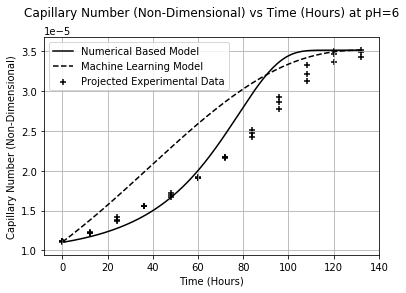

In [18]:
plt.plot(np.arange(0,133),num_CN[0:133],label='Numerical Based Model',color='black')
plt.plot(np.arange(0,133),ml_CN,label='Machine Learning Model',color='black',linestyle='dashed')
plt.scatter(np.arange(0,133,12),ml_CN_1,label='Projected Experimental Data',color='black',marker='+')
plt.scatter(np.arange(0,133,12),ml_CN_2,color='black',marker='+')
plt.scatter(np.arange(0,133,12),ml_CN_3,color='black',marker='+')

plt.grid()
plt.legend()
plt.xlabel('Time (Hours)')
plt.ylabel('Capillary Number (Non-Dimensional)')
plt.title('Capillary Number (Non-Dimensional) vs Time (Hours) at pH=6\n')
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))


In [19]:
num_Oil=1-((np.tanh(-6500*num_CN)+1+0.1)/(np.tanh(-6500*0.000001)+1+0.1))
print(num_Oil)

ml_Oil=1-((np.tanh(-6500*ml_CN)+1+0.1)/(np.tanh(-6500*0.000001)+1+0.1))
print(ml_Oil)

ml_Oil_1=1-((np.tanh(-6500*ml_CN_1)+1+0.1)/(np.tanh(-6500*0.000001)+1+0.1))
print(ml_Oil_1)

ml_Oil_2=1-(np.tanh(-6500*ml_CN_2)+1+0.1)/(np.tanh(-6500*0.000001)+1+0.1)
print(ml_Oil_2)

ml_Oil_3=1-(np.tanh(-6500*ml_CN_3)+1+0.1)/(np.tanh(-6500*0.000001)+1+0.1)
print(ml_Oil_3)


13     0.061881
14     0.059616
15     0.059910
16     0.060213
17     0.060527
         ...   
141    0.199453
142    0.199453
143    0.199453
144    0.199453
145    0.199453
Name: bio1, Length: 133, dtype: float64
[[0.05961643]
 [0.06088308]
 [0.06216214]
 [0.0634534 ]
 [0.06475667]
 [0.0660717 ]
 [0.06739828]
 [0.06873616]
 [0.07008509]
 [0.07144482]
 [0.07281508]
 [0.07419559]
 [0.07558606]
 [0.0769862 ]
 [0.07839572]
 [0.07981429]
 [0.08124159]
 [0.08267731]
 [0.0841211 ]
 [0.08557261]
 [0.0870315 ]
 [0.0884974 ]
 [0.08996994]
 [0.09144876]
 [0.09293346]
 [0.09442366]
 [0.09591896]
 [0.09741895]
 [0.09892323]
 [0.10043138]
 [0.10194298]
 [0.1034576 ]
 [0.10497481]
 [0.10649417]
 [0.10801523]
 [0.10953755]
 [0.11106068]
 [0.11258417]
 [0.11410754]
 [0.11563034]
 [0.1171521 ]
 [0.11867235]
 [0.12019063]
 [0.12170645]
 [0.12321934]
 [0.12472883]
 [0.12623443]
 [0.12773567]
 [0.12923206]
 [0.13072313]
 [0.13220839]
 [0.13368737]
 [0.13515959]
 [0.13662456]
 [0.13808182]
 [0.13953089]


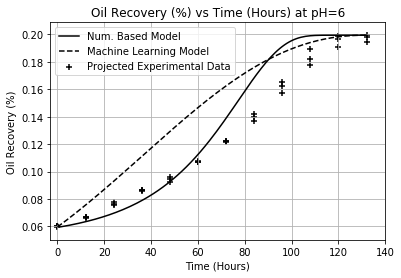

In [20]:
plt.plot(np.arange(0,133),num_Oil[0:133],label='Num. Based Model',color='black')
plt.plot(np.arange(0,133),ml_Oil,label='Machine Learning Model',color='black',linestyle='dashed')
plt.scatter(np.arange(0,133,12),ml_Oil_1,label='Projected Experimental Data',color='black',marker='+')
plt.scatter(np.arange(0,133,12),ml_Oil_2,color='black',marker='+')
plt.scatter(np.arange(0,133,12),ml_Oil_3,color='black',marker='+')

plt.grid()
plt.legend()
plt.xlim(-3,140)
#plt.ylim(0,0.65)
plt.xlabel('Time (Hours)')
plt.ylabel('Oil Recovery (%)')
plt.title('Oil Recovery (%) vs Time (Hours) at pH=6')
plt.show()


In [21]:
df['num_cn']=num_CN
df['ml_CN']=pd.DataFrame(ml_CN)
df

,mic1,suc1,bio1,mic2,mic3,suc2,suc3,bio2,bio3,ift1,ift2,ift3,time,num_ift,num_cn,ml_CN
0,0.114500,19.751000,0.082100,0.10080,0.11242,19.765,19.689,0.08450,0.07450,45.001,45.256,44.544,0.0,NaN,NaN,0.000011
1,0.204750,19.184000,0.184340,0.18560,0.20045,19.005,19.124,0.17642,0.16859,41.235,40.895,40.752,12.0,NaN,NaN,0.000011
2,0.375600,17.521000,0.237410,0.32450,0.35634,17.520,17.535,0.22513,0.24510,36.421,36.123,35.228,24.0,NaN,NaN,0.000011
3,0.521300,16.724000,0.275640,0.48964,0.49865,16.711,16.735,0.26417,0.26621,32.101,32.012,32.156,36.0,NaN,NaN,0.000012
4,0.687900,15.658000,0.382170,0.62456,0.71580,15.659,15.556,0.35618,0.37520,29.101,30.014,29.456,48.0,NaN,NaN,0.000012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,2.163450,7.833434,1.374066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.2234,0.000035,NaN
142,2.163642,7.832321,1.374187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.2234,0.000035,NaN
143,2.163788,7.831479,1.374279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.2234,0.000035,NaN
144,2.163898,7.830841,1.374348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.2234,0.000035,NaN


In [22]:
np.sqrt((((df['num_cn'][13:]-df['ml_CN'][0:133])**2)[13:133].sum())/133)


5.927335674062917e-06

In [23]:
#RMSE
from sklearn.metrics import mean_squared_error
print('Sucrose: ',round(np.sqrt(mean_squared_error(df.iloc[13:,1],pred_suc3)),5))
print('Microbe: ',round(np.sqrt(mean_squared_error(df.iloc[13:,0],pred_mic3)),5))
print('Biosurfactant: ',round(np.sqrt(mean_squared_error(df['bio1'][13:,],pred_bio3)),5))
print('IFT: ',round(np.sqrt(mean_squared_error(num_ift[0:133],calc_ift3)),5))
print('CN: ',round(np.sqrt(mean_squared_error(num_CN[0:133],ml_CN)),5))
print('Oil: ',round(np.sqrt(mean_squared_error(num_Oil[0:133],ml_Oil)),5))



Sucrose:  1.38996
Microbe:  0.22057
Biosurfactant:  0.10969
IFT:  5.46119
CN:  0.0
Oil:  0.02103
